In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from funcs.utils import *

In [2]:
N = 10000
g_list = [0.9, 0.9, 1.3, 1.3]
sigma_list = [0.1, 1.0, 0.1, 1.0]
sigma_noise_list = [0.1, 0.1, 0.1, 0.1]
phi = np.tanh
Tobs = 10000
Tinit = 1000

In [3]:
data = np.load("data/mcscaling_gaussian.npy")
nums = data.shape[1]
max_leadout = data.shape[2]

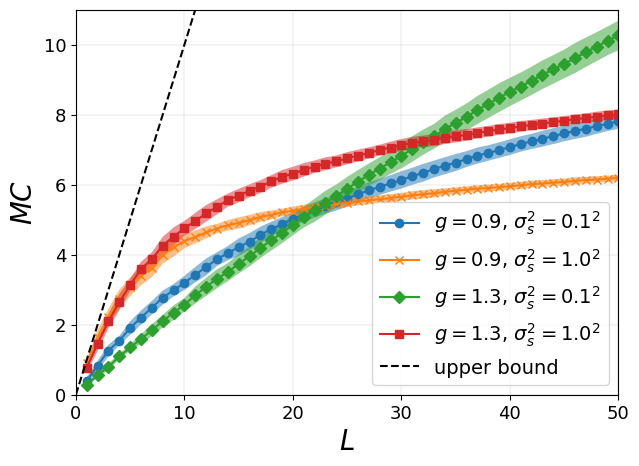

In [4]:
fig = plt.figure(figsize=(7,5))
markers =["o", "x", "D", "s"]

for i in range(len(g_list)):
    g = g_list[i]; sigma_s = sigma_list[i]; sigma_n = sigma_noise_list[i]
    mcs_mean = np.mean(data[i,:,:], axis=0)
    mcs_std = np.std(data[i,:,:], axis=0)
    plt.plot(np.arange(1,max_leadout+1), mcs_mean, markersize=6, marker=markers[i], label=r"$g=$"+f"{g}, "r"$\sigma_s^2=$"+f"{sigma_s}"+r"$^2$")
    plt.fill_between(np.arange(1,max_leadout+1),mcs_mean-mcs_std, mcs_mean+mcs_std, alpha=0.5)
plt.plot(np.arange(0,max_leadout+1),np.arange(0,max_leadout+1),linestyle="--",color="k", label="upper bound")
plt.xlabel(r"$L$",fontsize=20)
plt.ylabel(r"$MC$",fontsize=20)
plt.tick_params(labelsize=13)
plt.xlim(0,50)
plt.ylim(0,11)
plt.legend(fontsize=14)
#plt.title(f"Gaussian(tanh), N={N}")
plt.grid(linewidth=0.2)
plt.show()